# Практическая работа 4


In [153]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import pylab
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
import tqdm

import scipy.stats as sts
import statistics
from sklearn.utils import shuffle

## 1. Загрузить данные из файла “insurance.csv”.

In [154]:
df = pd.read_csv("data/insurance.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [155]:
df.head(1)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884.924


**Данные датасета** содержат 7 столбцов. Интуитивно можно понять, что датасет связан со страхованием и хранит информацию о людях, а именно:
* Возраст,
* Пол,
* Индекс массы тела в кг,
* Количество детей,
* Является ли курильщиком,
* Регион проживания,
* Сбережения.

## 2. С помощью метода describe() посмотреть статистику по данным. Сделать выводы.

In [156]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


**Что мы получили?**
Методом выше мы получаем информацию о нашем датасете:
* count - количество ненулевых значений,
* mean - среднее значение,
* std - стандартное отклонение (относительно ее математического ожидания на основе несмещенной оценки ее дисперсии),
* min - минимальное значение, max - максимальное.
* 25, 50, 75 - перцентилисы, нужны для того, чтобы мы поняли, как распределяются данные.

Например, 25% значит 25% данных по столбцу age имеют значение 27.0000 или ниже. То есть если бы вы посмотрели на данные вручную, 25% их было бы меньше или равно 27.

**Вывод по нашим данным**
То есть, у нас среди данных нет нулевых значений, что очень приятно.
В среднем, люди имеют одного ребенка и сбережения в 13270 условную денежную единицу.
Максимальный возраст - 64 года, минимальный - 18 лет.

Уже интересно, что 25 процентов людей в датасете не имеют детей.

## 3. Построить гистограммы для числовых показателей. Сделать выводы.

У нас 4 числовых показателя: age, bmi, children, charges.

array([[<AxesSubplot: title={'center': 'age'}>,
        <AxesSubplot: title={'center': 'bmi'}>],
       [<AxesSubplot: title={'center': 'children'}>,
        <AxesSubplot: title={'center': 'charges'}>]], dtype=object)

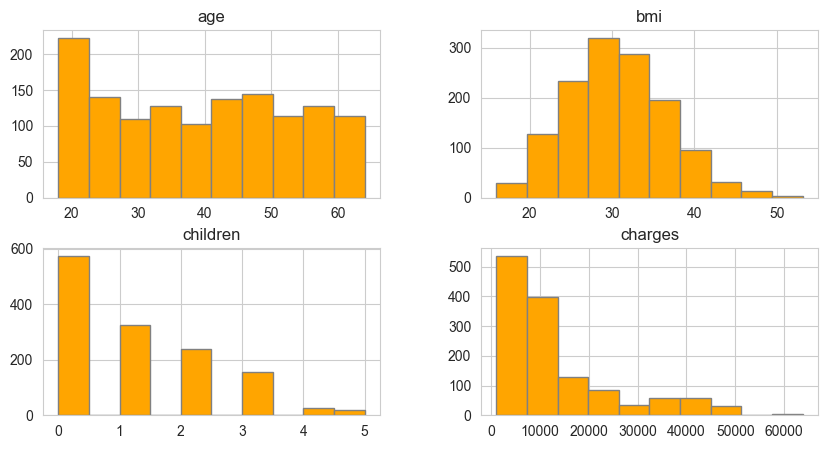

In [157]:
df.hist(color='orange', edgecolor='grey', figsize=(10,5))

Можно сделать выводы:
* большая часть людей прихоится на возраст 18-20 лет
* основной индекс массы тела сосредоточен на 30
* большинство людей не имеют детей
* у большей частей людей сбережения меньше 10000 у.д.е.

4. Найти меры центральной тенденции и меры разброса для индекса массы тела (bmi) и расходов (charges). Отобразить результаты в виде текста и на гистограммах (3 вертикальные линии). Добавить легенду на графики. Сделать выводы.

**Меры центральной тенденции**
Необходимо найти среднее (mean), медиану (median), моду (mode).

• Мода. Это значение, которое наиболее часто встречается в выборке.
• Медиана. Для нечетного количества элементов медиана равна центральному элементу в отсортированном массиве.
• Среднее. Сумма значений всех элементов выборки, деленное на их количество.

**Меры разброса**
Необходимо найти размах (range), стандартное отклонение (standard deviation) и межквартильный размах (interquartile range).

• Размах. Разница между максимальным и минимальным значением выборки. Очень простая мера, но она использует только два значения из всей выборки. Правильнее использовать каждое значение из выборки для расчета изменчивости данных.
• Стандартное отклонение. Это корень из дисперсии. Это оценка для выборки. Считается, что стандартное отклонение выборки немного недооценивается, поэтому ее чуть-чуть увеличивают, делив на n-1, а не на n, как для генеральной совокупности. Для генеральной совокупности такой показатель называется среднеквадратическим отклонением. Этот показатель позволяет оценить, как сильно меняются данные относительно их среднего. Стандартное отклонение не устойчиво к выбросам.
• Межквартильный размах (IQR). Для всех выборок существуют такие отсечки, которые называются «квартили», их всего три: Q1, Q2 и Q3. Межквартильный размах – разность между Q3 (75%) и Q1 (25%), это ширина интервала, который содержит 50% данных. Это метрика полезна для описания данных, она устойчива к выбросам

In [158]:
class Measure:
      """
      Object with tendency and dispersion parameters.
      """
      def __init__(self, data: pd.Series, show: bool, linesize: int):
            self.data = data
            self.show = show
            self.name = data.name
            self.linesize = linesize

            # Central tendency
            self.tend_mean = None
            self.tend_median = None
            self.tend_mode = None
            self.tend_mode_count = None

            # Dispersion
            self.dis_range = None
            self.dis_std_deviation = None
            self.dis_iqr = None

      def __call__(self, *args, **kwargs):
            self.tendency = self.calc_tendency()
            self.dispersion = self.calc_dispersion()

            if self.show:
                  self.__show_results()


      def calc_tendency(self) -> dict:
            self.tend_mean = np.mean(self.data)
            self.tend_median = np.median(self.data)
            self.tend_mode = sts.mode(self.data, keepdims=False).mode
            self.tend_mode_count = sts.mode(self.data, keepdims=False).count
            return {"mean": self.tend_mean, "median": self.tend_median, "mode": self.tend_mode, "mode_count": self.tend_mode_count}

      def calc_dispersion(self) -> dict:
            self.dis_range = self.data.max() - self.data.min()
            self.dis_iqr = sts.iqr(self.data, interpolation="midpoint")
            self.dis_std_deviation = self.data.std()
            return {"range": self.dis_range, "iqr": self.dis_iqr, "standard_deviation": self.dis_std_deviation}

      def __show_parameters(self, res: dict, measure_name: str) -> None:
                  print(f"> {self.name} {measure_name} parameters:")
                  for key in res.keys():
                        print(f"\t{key} = {round(res[key],2)}")
                  print()

      def __show_results(self):
            self.__show_parameters(self.tendency, "tendency")
            self.__show_parameters(self.dispersion, "dispersion")

            fig = px.histogram(self.data, nbins=20)
            fig.update_traces(textfont_size=14, textangle=0, textposition='outside', marker=dict(coloraxis="coloraxis"), marker_line_width=2, marker_line_color="grey")
            fig.update_layout(title=f'{self.name} histogram', title_font_size=20)
            for key in self.tendency.keys():
                  if key != "mode_count":
                        fig.add_trace(go.Scatter(x=[self.tendency[key],self.tendency[key]], y=[0,self.linesize], mode='lines',name=key))
            fig.show()

In [159]:
Measure(df['bmi'], True, 180)()

> bmi tendency parameters:
	mean = 30.66
	median = 30.4
	mode = 32.3
	mode_count = 13

> bmi dispersion parameters:
	range = 37.17
	iqr = 8.38
	standard_deviation = 6.1



Можем сделать вывод, что самое часто встречамое число - 32.3, среднее - лежит около 30, а медиана (если отсортировать все числа и взять то, что лежит посередине) - равна 30.4. При этом разница между максимальным и минимальным значением равна 37.17, межквартильный размах - около 8, отклонение - 6.

In [160]:
Measure(df['charges'], True, 380)()

> charges tendency parameters:
	mean = 13270.42
	median = 9382.03
	mode = 1639.56
	mode_count = 2

> charges dispersion parameters:
	range = 62648.55
	iqr = 11879.8
	standard_deviation = 12110.01



Можем сделать вывод, что самое часто встречамое число - 1639, среднее - лежит около 13270, а медиана (если отсортировать все числа и взять то, что лежит посередине) - равна 9382. При этом разница между максимальным и минимальным значением равна 62648, межквартильный размах - около 11879, отклонение - 12110.

## 5. Построить box-plot для числовых показателей. Названия графиков должны соответствовать названиям признаков. Сделать выводы.

In [161]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [162]:
def plot_numeric(data: pd.DataFrame) -> None:
      for key in data.keys():
            if type(data[key][0]) != str:
                  fig = px.box(data, y=key)
                  fig.update_layout(title=f'Box-plot diagram for {key}', title_font_size=20)
                  fig.show()

plot_numeric(df)

**Что мы построили?** - ящик с усами, показывающий рпспределение вероятностей.

По диаграммам, построенным  выше, мы можем узнать следующую информацию:
* max - максимальное значение.
* upper fence - верхняя граница.
* q3 - верхний квартиль (точки со значениям меньше/равными 75%  среди всех данных)
* median - медиану.
* q1 - нижний квартиль (точки со значениям меньше/равными 25%  среди всех данных).
* min - минимальное значение, в данном случае еще и нижняя граница.

## 6. Используя признак charges или imb, проверить, выполняется ли центральная предельная теорема. Использовать различные длины выборок n. Количество выборок = 300. Вывести результат в виде гистограмм. Найти стандартное отклонение и среднее для полученных распределений. Сделать выводы.

Возьмем 300 выборок, для каждой из этих выборок посчитать среднее значение, и сделать список из этих 300 средних, и по этому списку график. У нас 1338 строк данных.

Возьмем n = 100

In [163]:
bmi_averages = []
charges_averages = []

for i in tqdm.tqdm(range(0,300)):
      df = shuffle(df).reset_index()
      df = df.drop(columns=['index'])
      bmi_averages.append(statistics.mean(list(df['bmi'][0:100])))
      charges_averages.append(statistics.mean(list(df['charges'][0:100])))

100%|██████████| 300/300 [00:00<00:00, 763.31it/s]


In [164]:
fig = px.histogram(bmi_averages, nbins=20)
fig.update_traces(textfont_size=14, textangle=0, textposition='outside', marker=dict(coloraxis="coloraxis"), marker_line_width=2, marker_line_color="grey")
fig.update_layout(title=f'BMI histogram', title_font_size=20)
fig.show()

In [165]:
fig = px.histogram(charges_averages, nbins=20)
fig.update_traces(textfont_size=14, textangle=0, textposition='outside', marker=dict(coloraxis="coloraxis"), marker_line_width=2, marker_line_color="grey")
fig.update_layout(title=f'Charges histogram', title_font_size=20)
fig.show()

Возьмем n = 1000

In [166]:
bmi_averages = []
charges_averages = []

for i in tqdm.tqdm(range(0,300)):
      df = shuffle(df).reset_index()
      df = df.drop(columns=['index'])
      bmi_averages.append(statistics.mean(list(df['bmi'][0:1000])))
      charges_averages.append(statistics.mean(list(df['charges'][0:1000])))

100%|██████████| 300/300 [00:00<00:00, 435.41it/s]


Строим графики

In [167]:
fig = px.histogram(bmi_averages, nbins=20)
fig.update_traces(textfont_size=14, textangle=0, textposition='outside', marker=dict(coloraxis="coloraxis"), marker_line_width=2, marker_line_color="grey")
fig.update_layout(title=f'BMI histogram', title_font_size=20)
fig.show()

In [168]:
fig = ff.create_distplot([bmi_averages], ['displot'], bin_size=1/20)
fig.show()

In [169]:
fig = px.histogram(charges_averages, nbins=20)
fig.update_traces(textfont_size=14, textangle=0, textposition='outside', marker=dict(coloraxis="coloraxis"), marker_line_width=2, marker_line_color="grey")
fig.update_layout(title=f'Charges histogram', title_font_size=20)
fig.show()

In [170]:
fig = ff.create_distplot([charges_averages], ['displot'], bin_size=100)
fig.show()

 Найти стандартное отклонение и среднее для полученных распределений.

In [171]:
averages_df = {'bmi': pd.Series(bmi_averages), 'charges': pd.Series(charges_averages)}

print(f"> bmi averages characteristics:\n\t"
      f"median: {np.median(averages_df['bmi'])}\n\t"
      f"standard deviation: {averages_df['bmi'].std()}")
print(f"> charges averages characteristics:\n\t"
      f"median: {np.median(averages_df['charges'])}\n\t"
      f"standard deviation: {averages_df['charges'].std()}")

> bmi averages characteristics:
	median: 30.664695000000002
	standard deviation: 0.10250740613966056
> charges averages characteristics:
	median: 13267.616338899501
	standard deviation: 201.3837858243064


## 7. Построить 95% и 99% доверительный интервал для среднего значения расходов и среднего значения индекса массы тела.

Рассчитаем стандартные ошибки для индекса массы тела и расходов

In [172]:
SE_bmi = np.median(averages_df['bmi'])/(1000)**(1/2)
SE_charges = np.median(averages_df['charges'])/(1000)**(1/2)
print(f"SE for bmi = {SE_bmi}\nSE for charges = {SE_charges}")

SE for bmi = 0.9697027995437701
SE for charges = 419.55886752186876


Построим доверительный интервал

In [173]:
def get_interval(data: dict, SE: list, show:bool) -> dict:
      if len(data.keys()) == len(SE):
            answer = dict()
            num = 0
            for key in data.keys():
                  median = np.median(data[key])
                  answer[key] = {'95%': [round(median - 1.96 * SE[num], 2), round(median + 1.96 * SE[num], 2)],
                                 '99%': [round(median - 2.58 * SE[num], 2), round(median + 2.58 * SE[num], 2)]}

            if show:
                  for key in data.keys():
                        print(f"> {key} characteristics:\n{answer[key]}")
      return answer

get_interval(averages_df, [SE_bmi, SE_charges], False)

{'bmi': {'95%': [28.76, 32.57], '99%': [28.16, 33.17]},
 'charges': {'95%': [13265.72, 13269.52], '99%': [13265.11, 13270.12]}}

## 8. Проверить распределения следующих признаков на нормальность: индекс массы тела, расходы. Сформулировать нулевую и альтернативную гипотезы. Для каждого признака использовать KS-тест и q-q plot. Сделать выводы на основе полученных p-значений.

Проверяем на нормальность

In [174]:
fig = px.histogram(df['bmi'], nbins=20)
fig.update_traces(textfont_size=14, textangle=0, textposition='outside', marker=dict(coloraxis="coloraxis"), marker_line_width=2, marker_line_color="grey")
fig.update_layout(title=f'BMI histogram', title_font_size=20)
fig.show()

Распределение похоже на нормальное

In [175]:
fig = px.histogram(df['charges'], nbins=70)
fig.update_traces(textfont_size=14, textangle=0, textposition='outside', marker=dict(coloraxis="coloraxis"), marker_line_width=2, marker_line_color="grey")
fig.update_layout(title=f'Charges histogram', title_font_size=20)
fig.show()

Нулевая гипотеза (отсуствие различий): распределение bmi является нормальным.
Альтернативная гипотеза (присутствуют различия): распределение bmi не является нормальным.

Нулевая гипотеза (отсуствие различий): распределение charges является нормальным.
Альтернативная гипотеза (присутствуют различия): распределение charges не является нормальным.

Можно сделать вывод о нормальности по box-plot: у bmi - все симметрично относительно медианы.
Но проверим все другими методами. Можно оценить моду, медиану и среднее выборки - у нормального распределения эти меры равны.

**Тест Колмогорова-Смирнова (KS-тест)**

Это непараметрический тест, который позволяет оценить существенность различий между распределениями двух выборок, например, оценка соответствия распределения исследуемой выборки закону нормального распределения. Критерий Колмогорова-Смирнова определяет расстояние между эмпирической функцией распределения выборки и функцией распределения эталонного распределения (это не обязательно распределение Гаусса). В случае проверки на нормальность распределения, выборки стандартизуются и сравниваются со стандартным нормальным распределением. Данный тест эффективен при размере выборки ≥ 50.

Возвращает два значения statistic и p-value.

Тест k-s возвращает статистику D и значение p, соответствующее статистике D. Статистика D представляет собой абсолютное максимальное расстояние (верхний предел) между CDF (кумулятивными функциями распределения) двух выборок. Чем ближе это число к 0, тем больше вероятность того, что две выборки были взяты из одного и того же распределения.

Значение p, возвращаемое критерием k-s, имеет ту же интерпретацию, что и другие значения p. Вы отвергаете нулевую гипотезу о том, что две выборки были взяты из одного и того же распределения, если p-значение меньше вашего уровня значимости.

In [176]:
test_ks_bim = sts.kstest(sts.zscore(df['bmi']), 'norm')
test_ks_charges = sts.kstest(sts.zscore(df['charges']), 'norm')
print(f"KS-test for bmi = {test_ks_bim} and charge = {test_ks_charges}")

KS-test for bmi = KstestResult(statistic=0.02613962682509635, pvalue=0.31453976932347394) and charge = KstestResult(statistic=0.18846204110424236, pvalue=4.39305730768502e-42)


p-значение намного меньше 0.05, следовательно нулевая гипотеза отвергается и выборка не имеет нормального распределения.

В нашем случае, мы можем сказать, что для bmi - распределение похоже на нормальное, в то время как для charges - оно им точно не является.

**q-q plot**

Представляет собой зависимость исходных значений выборки и значений идеального нормального распределения. Если наблюдается идеальная прямая, то данные следуют нормальному закону, если наблюдается отклонение выше прямой, то исходные значения выше, чем нормальные, и наоборот. Удобно использовать Q-Q plot, когда данных немного. Также Q-Q plot позволяет определить асимметрию в данных.

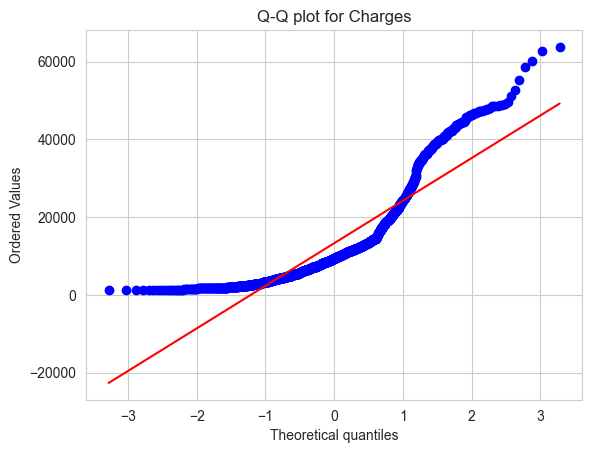

In [177]:
sts.probplot(df['charges'], dist="norm", plot=pylab)
pylab.title("Q-Q plot for Charges")
pylab.show()

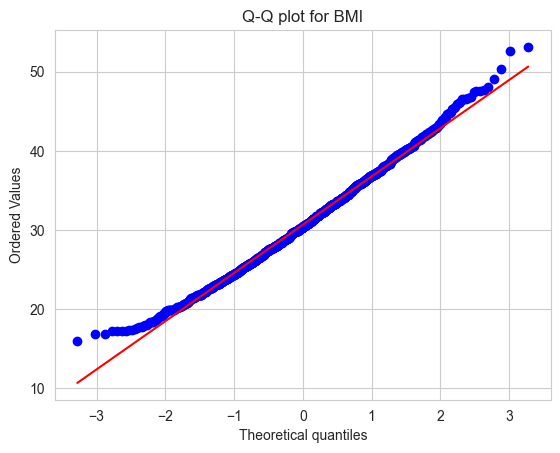

In [178]:
sts.probplot(df['bmi'], dist="norm", plot=pylab)
pylab.title("Q-Q plot for BMI")
pylab.show()